# Custo de plano de saúde
- Péricles S. G. Marques
- https://www.linkedin.com/in/periclessavio/

### Objetivo:
Criar um modelo de regressão linear múltipla para prever os custos de plano de saúde

##### Carregar bibliotecas e dados

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
insurance = pd.read_csv('medical_insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


##### Analidar os dados

In [4]:
print("O data set tem {} linhas e {} colunas".format(insurance.shape[0], insurance.shape[1]))

O data set tem 1338 linhas e 7 colunas


In [5]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
print("Checando se há dados nulos.")
insurance.isnull().sum()

Checando se há dados nulos.


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
print(insurance.dtypes)
print("\nAs variáveis 'sex', 'smoker' e 'region' são variáveis não numéricas.")

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

As variáveis 'sex', 'smoker' e 'region' são variáveis não numéricas.


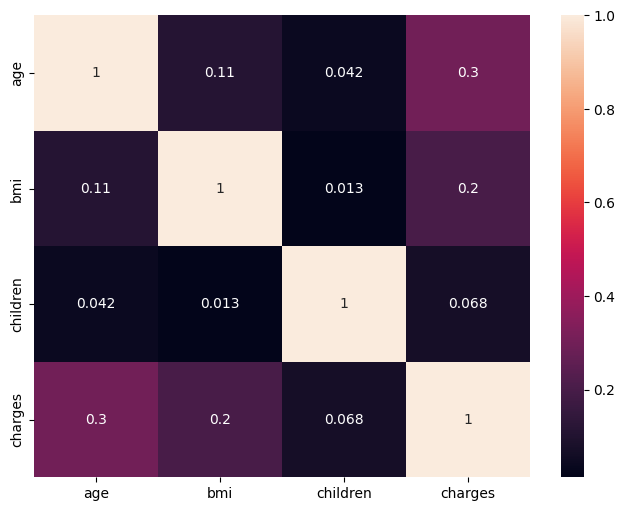

Verificando a correlação entre as variáveis quantitativas.


In [8]:
corr = insurance.corr(numeric_only=True)

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr, annot= True)
plt.show()

print("Verificando a correlação entre as variáveis quantitativas.")

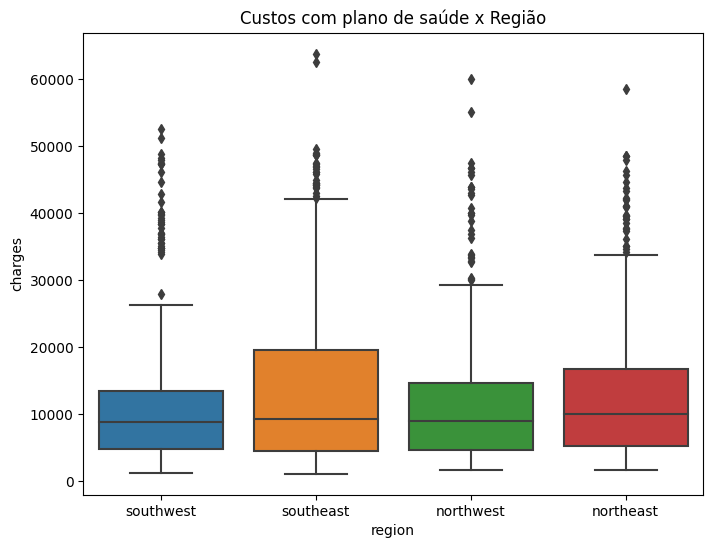

Não há diferenças significativas entre as regiões.


In [9]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x='region', y='charges', data=insurance).set(title='Custos com plano de saúde x Região')
plt.show()

print("Não há diferenças significativas entre as regiões.")

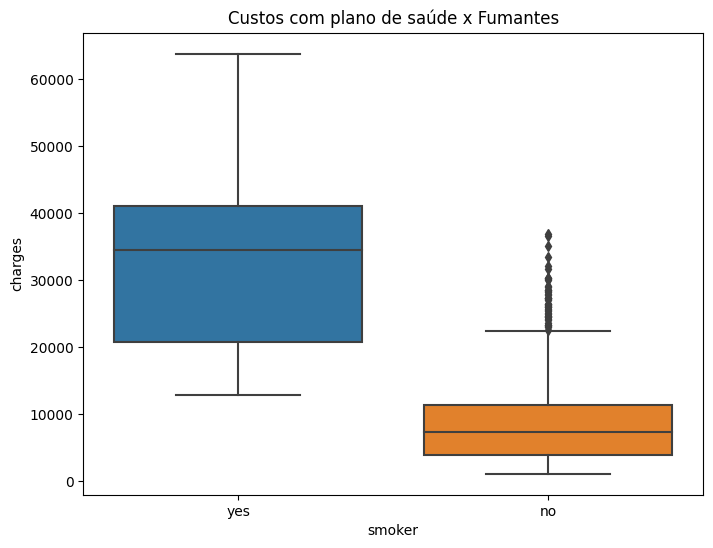

Pessoas que fumam gastam mais com o plano de saúde do que as que não fumam.


In [10]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x='smoker', y='charges', data=insurance).set(title='Custos com plano de saúde x Fumantes')
plt.show()

print("Pessoas que fumam gastam mais com o plano de saúde do que as que não fumam.")

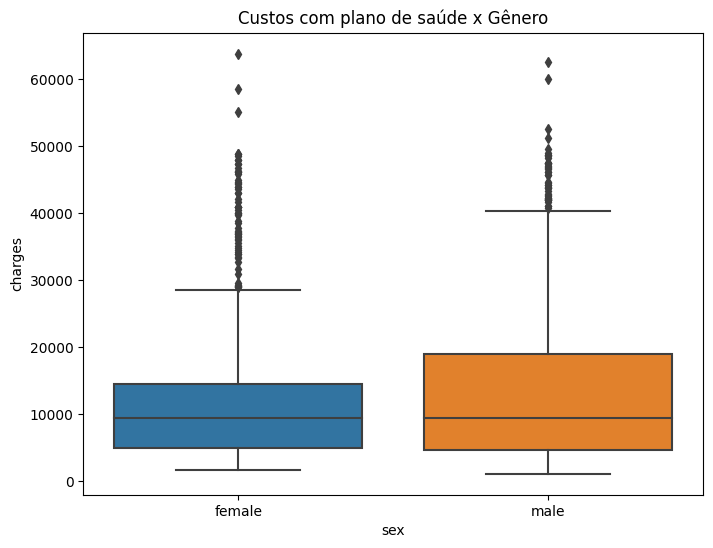

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x='sex', y='charges', data=insurance).set(title='Custos com plano de saúde x Gênero')
plt.show()

Text(0.5, 1.0, 'Custos x Índice de massa corporal')

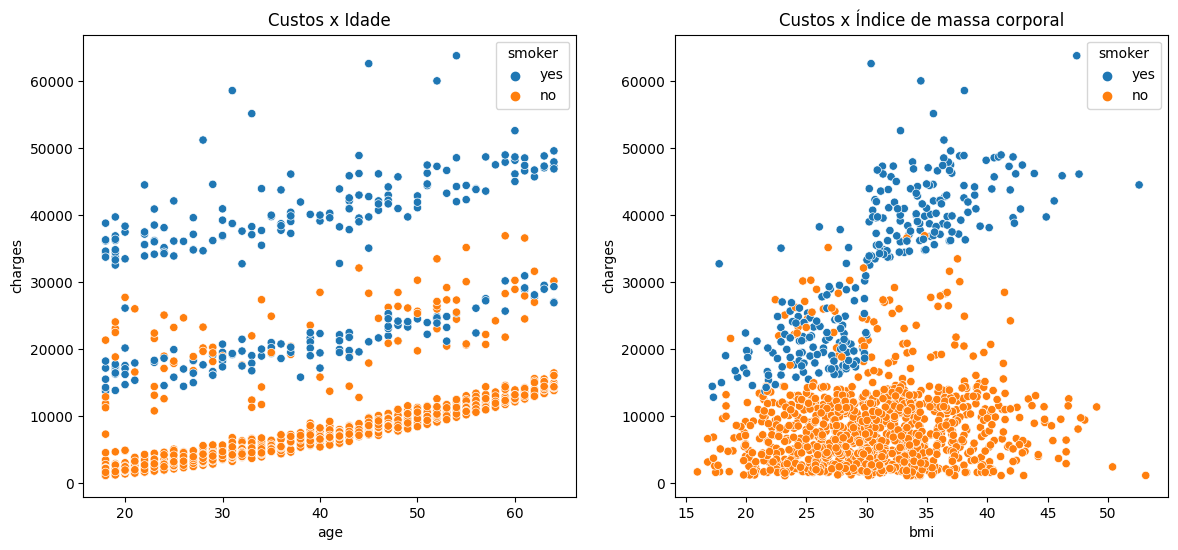

In [12]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='age', y='charges', data=insurance, hue='smoker',ax=ax)
ax.set_title('Custos x Idade')

ax = f.add_subplot(122)
sns.scatterplot(x='bmi', y='charges', data=insurance, hue='smoker')
ax.set_title('Custos x Índice de massa corporal')


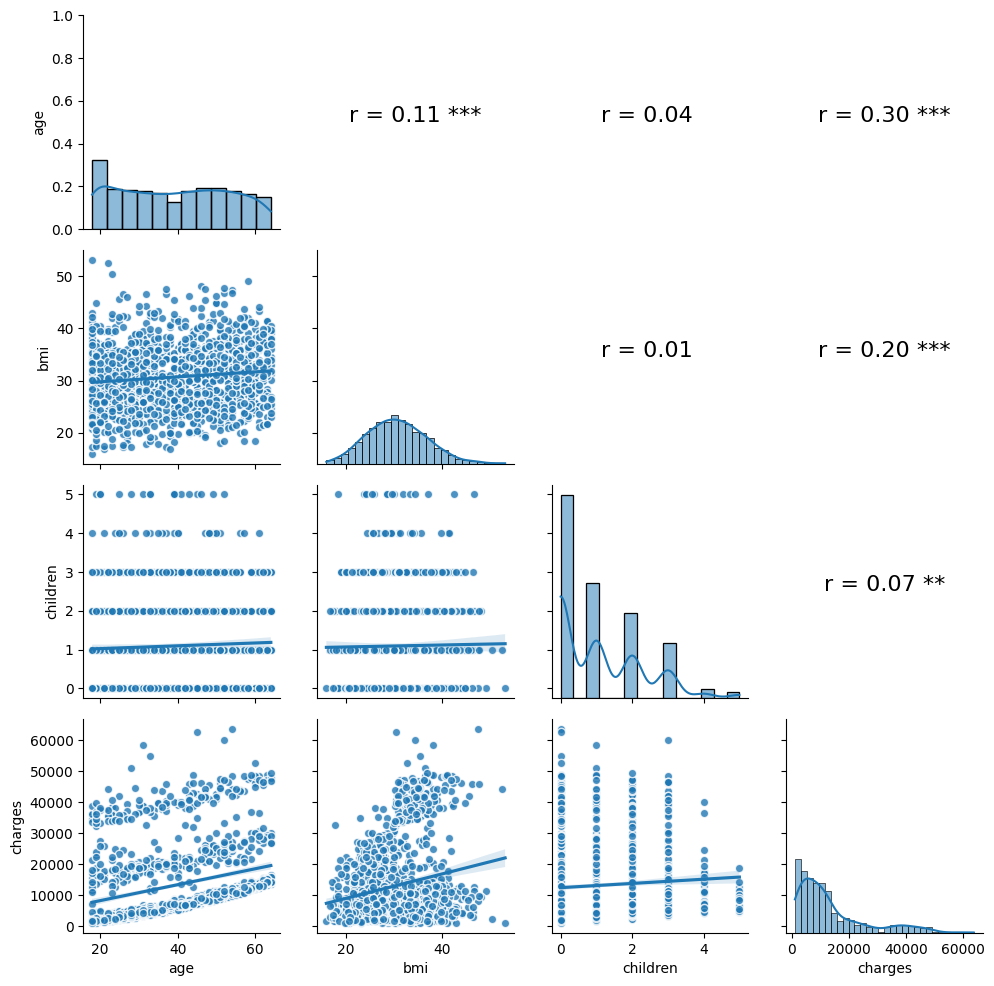

In [13]:
from scipy.stats import pearsonr
def reg_coef(x,y,label=None,color=None, **kwargs):
    ax = plt.gca()
    r,p = pearsonr(x,y)
    if p < 0.01:
        sig_level = '***'
    elif p < 0.05:
        sig_level = '**'
    elif p < 0.05:
        sig_level = '*'
    else:
        sig_level = ''
        
    ax.annotate('r = {:.2f} {}'.format(r, sig_level), xy=(0.5,0.5), xycoords='axes fraction', ha='center')
    ax.texts[0].set_size(16)
    ax.set_axis_off()

# Create the plot
g = sns.PairGrid(data=insurance, vars=["age", "bmi", "children", "charges"], hue=None)
g.map_upper(reg_coef)
g = g.map_lower(sns.regplot, scatter_kws={"edgecolor": "white"})
g = g.map_diag(sns.histplot, kde=True)
plt.show()

In [14]:
print("Transformar as variáveis categóricas em variáveis dummies\n")
# aplicar a função get_dummies() para criar as variáveis dummy
insurance_dummy = pd.get_dummies(insurance, columns=['sex', 'smoker', 'region'])

# exibir o novo dataframe com as variáveis dummy
insurance_dummy

Transformar as variáveis categóricas em variáveis dummies



,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [15]:
insurance_dummy.describe()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.494768,0.505232,0.795217,0.204783,0.242152,0.242900,0.272048,0.242900
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.500160,0.403694,0.403694,0.428546,0.428995,0.445181,0.428995
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Verificar a correlação das variáveis (dummy).


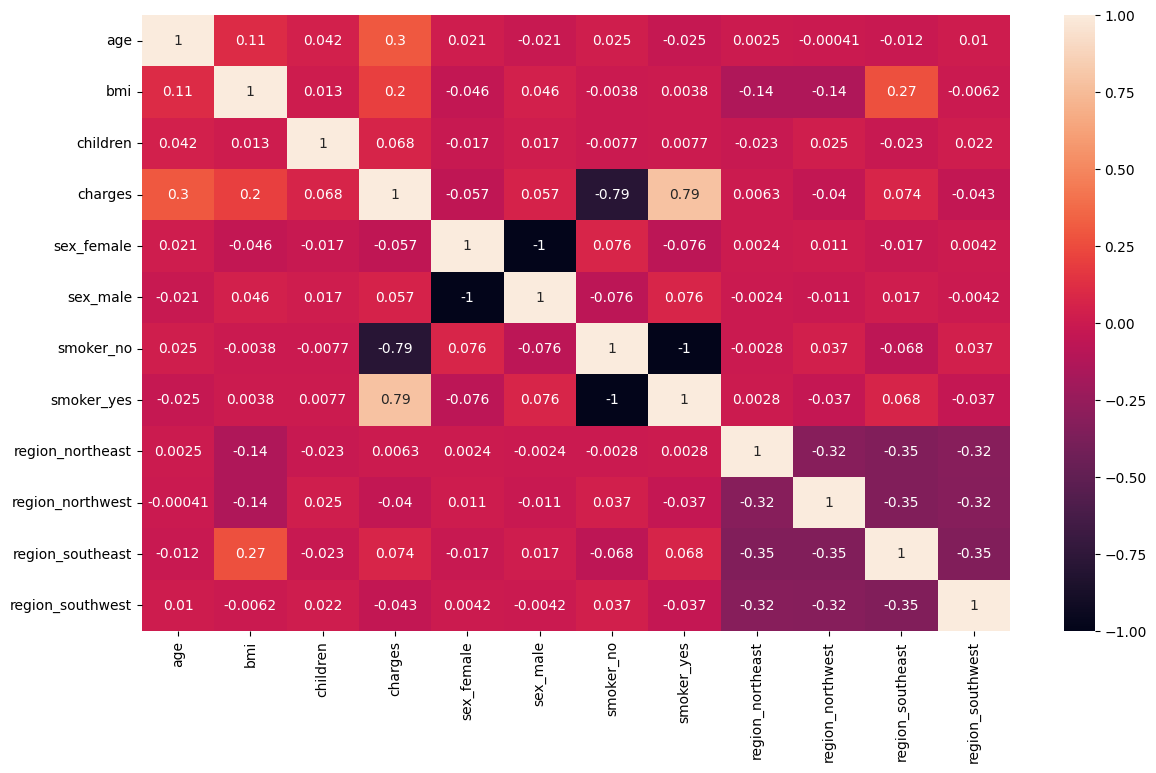

O custo do plano de saúde está fortemente relacionado com o hábito de fumar.


In [16]:
print("Verificar a correlação das variáveis (dummy).")
corr = insurance_dummy.corr()

fig, ax = plt.subplots(figsize=(14, 8))
sns.heatmap(corr, annot= True)
plt.show()

print("O custo do plano de saúde está fortemente relacionado com o hábito de fumar.")

In [17]:
print('Verificar a normalidade dos dados:\n')

from scipy.stats import shapiro

# iterar pelas colunas do dataframe e aplicar o teste Shapiro-Wilk
for col in insurance_dummy.columns:
    stat, p = shapiro(insurance_dummy[col])
    alpha = 0.05
    if p > alpha:
        print(f'{col} segue uma distribuição normal (p = {p:.4f})')
    else:
        print(f'{col} não segue uma distribuição normal (p = {p:.4f})')

Verificar a normalidade dos dados:

age não segue uma distribuição normal (p = 0.0000)
bmi não segue uma distribuição normal (p = 0.0000)
children não segue uma distribuição normal (p = 0.0000)
charges não segue uma distribuição normal (p = 0.0000)
sex_female não segue uma distribuição normal (p = 0.0000)
sex_male não segue uma distribuição normal (p = 0.0000)
smoker_no não segue uma distribuição normal (p = 0.0000)
smoker_yes não segue uma distribuição normal (p = 0.0000)
region_northeast não segue uma distribuição normal (p = 0.0000)
region_northwest não segue uma distribuição normal (p = 0.0000)
region_southeast não segue uma distribuição normal (p = 0.0000)
region_southwest não segue uma distribuição normal (p = 0.0000)


In [18]:
print('Realizar a transformação de boxcox.\n')

from scipy.stats import boxcox
y_bc,lam, ci= boxcox(insurance_dummy['charges'],alpha=0.05)

insurance_dummy['charges'] = y_bc
ci,lam

print(f' O lambda é {lam:.4f}')
print(f' O intervalo para o valor de lambda é {ci[0]:.4f} e {ci[1]:.4f}')

Realizar a transformação de boxcox.

 O lambda é 0.0436
 O intervalo para o valor de lambda é -0.0114 e 0.0988


### Modelo

In [19]:
from sklearn.model_selection import train_test_split
X = insurance_dummy.drop('charges',axis=1) # Independet variable
y = insurance_dummy['charges'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

In [20]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [21]:
predict = modelo.predict(X_test)

#mean square error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(predict,y_test)

#R- square

r_sq = modelo.score(X_test,y_test)

print(f'O intercepto é {modelo.intercept_:.4f}\n')
print(f'Os coeficientes são: {modelo.coef_}\n')

print(f'Erro quadrático médio {mse}\n')
print(f'O R2 é {r_sq}')

O intercepto é 9.1861

Os coeficientes são: [ 0.04827816  0.02124078  0.14622909  0.04956731 -0.04956731 -1.1671772
  1.1671772   0.12338306  0.04206861 -0.08856059 -0.07689108]

Erro quadrático médio 0.41437134694574984

O R2 é 0.7782997842340319


### Avaliando o modelo

Text(0.5, 1.0, 'Avaliando a linearidade:\n Atual vs previsto')

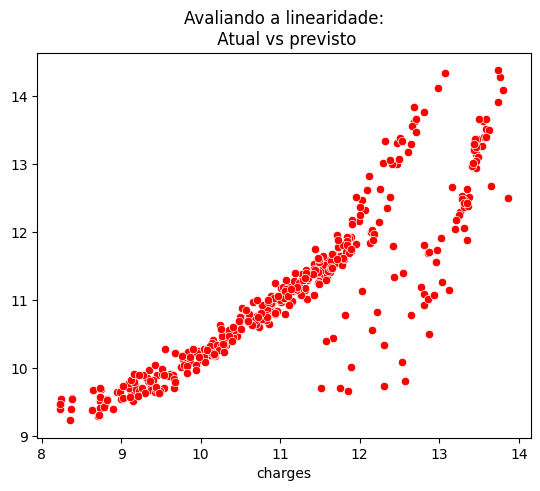

In [71]:
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(x=y_test, y=predict, ax=ax, color='r')
ax.set_title('Avaliando a linearidade:\n Atual vs previsto')

Não há linearidade.

Avaliando os resíduos


Text(0.5, 1.0, 'Check for Residual normality & mean: \n Residual eror')

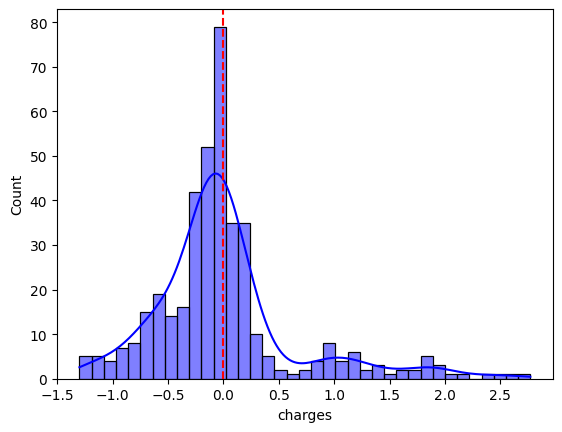

In [77]:
print('Avaliando os resíduos')
ax = f.add_subplot(122)
sns.histplot((y_test - predict), kde=True , color='b')
plt.axvline(x=(y_test - predict).mean(), color='red', linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror')


In [25]:
print(f' Média dos resíduos: {(y_test - predict).mean():.6f}')

 Média dos resíduos: -0.000749


A normalidade residual refere-se à normalidade dos resíduos em um modelo de regressão. Resíduos são as diferenças entre os valores reais e os valores previstos gerados pelo modelo. Em um modelo de regressão bem ajustado, os resíduos devem ser normalmente distribuídos com média zero. A média dos resíduos é uma medida da diferença média entre os valores reais e previstos. Se a média dos resíduos for próxima de zero, isso indica que o modelo está fazendo previsões precisas na média. Se a média dos resíduos for significativamente diferente de zero, sugere que o modelo é viesado e precisa ser melhorado.

Q-Q plot para checar a linearidade dos resíduos


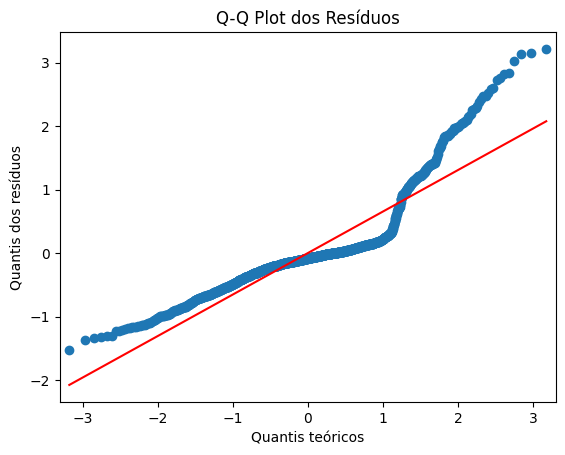

In [99]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

print('Q-Q plot para checar a linearidade dos resíduos.')

modelo = sm.OLS(insurance_dummy.iloc[:,3], sm.add_constant(insurance_dummy.iloc[:, [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11]])).fit()
residuos = modelo.resid
sm.qqplot(residuos, line='s')

plt.xlabel("Quantis teóricos")
plt.ylabel("Quantis dos resíduos")
plt.title("Q-Q Plot dos Resíduos")
plt.show()

O teste Q-Q (Quantile-Quantile) é um método gráfico utilizado para verificar se uma distribuição de dados segue uma distribuição teórica, como a Distribuição Normal.

In [67]:
import scipy.stats as stats

data = y_test - predict

statistic, p_value = stats.kstest(data, 'norm')
print("Estatística do teste:", statistic)
print("Valor p:", p_value)


Estatística do teste: 0.24195112692513177
Valor p: 3.3583976627240324e-21


Text(0.5, 1.0, 'Check for Homoscedasticity: \nResidual Vs Predicted')

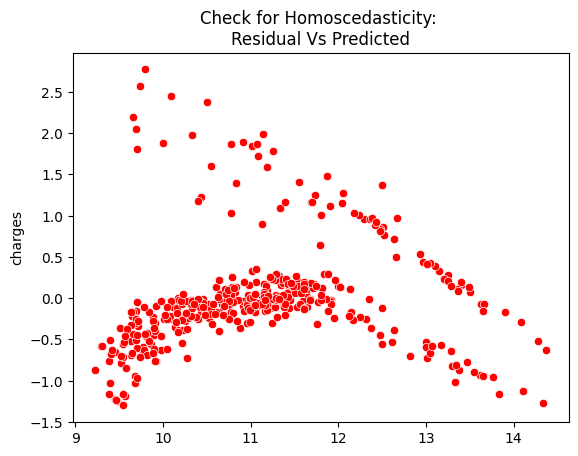

In [107]:
f,ax = plt.subplots()

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - predict), x= predict, ax = ax,color='r') 
ax.set_title('Check for Homoscedasticity: \nResidual Vs Predicted')

Os resíduos são heterocedástico.

In [31]:
print('Checando a multicolinearidade:\n')
VIF = 1/(1- r_sq)
print(f'VIF (Variance Inflation Factor): {VIF:.4f}')

Checando a multicolinearidade:

VIF (Variance Inflation Factor): 4.5106


A multicolinearidade é um problema comum na análise de regressão linear múltipla, em que duas ou mais variáveis independentes são altamente correlacionadas umas com as outras. Isso pode levar a coeficientes de regressão instáveis e não confiáveis, dificultando a interpretação do impacto de cada variável independente na variável dependente.

O Variance Inflation Factor (VIF) é uma medida da extensão da multicolinearidade em um modelo de regressão linear múltipla. É calculado como a razão da variância dos valores preditos quando todas as variáveis independentes são usadas, para a variância dos valores preditos quando uma única variável independente é usada. A pontuação VIF é definida como 1/(1 - R^2), onde R^2 é o valor de R-quadrado do modelo que inclui a variável independente em questão. Uma pontuação VIF superior a 5 ou 10 é frequentemente considerada um sinal de alta multicolinearidade.

# Referências
- https://www.kaggle.com/code/sudhirnl7/linear-regression-tutorial/notebook
- https://www.kaggle.com/code/mariapushkareva/medical-insurance-cost-with-linear-regression
- https://www.kaggle.com/code/grosvenpaul/regression-eda-and-statistics-tutorial
- https://www.kaggle.com/code/ruslankl/health-care-cost-prediction-w-linear-regression